In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
url = 'https://raw.githubusercontent.com/klaytoncastro/idp-storytelling/master/airquality/airquality.csv'
df = pd.read_csv(url, delimiter=';', decimal=',')
df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.drop(columns=['Date', 'Time'], inplace=True)
df.replace(-200, np.nan, inplace=True)
df.drop(columns=['NMHC(GT)'], inplace=True)
df = df.fillna(method='ffill').fillna(method='bfill')
df.head()

/tmp/ipykernel_2989/1841818391.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill').fillna(method='bfill')


,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2.6,1360.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,2004-03-10 18:00:00
1,2.0,1292.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,2004-03-10 19:00:00
2,2.2,1402.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,2004-03-10 20:00:00
3,2.2,1376.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,2004-03-10 21:00:00
4,1.6,1272.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,2004-03-10 22:00:00


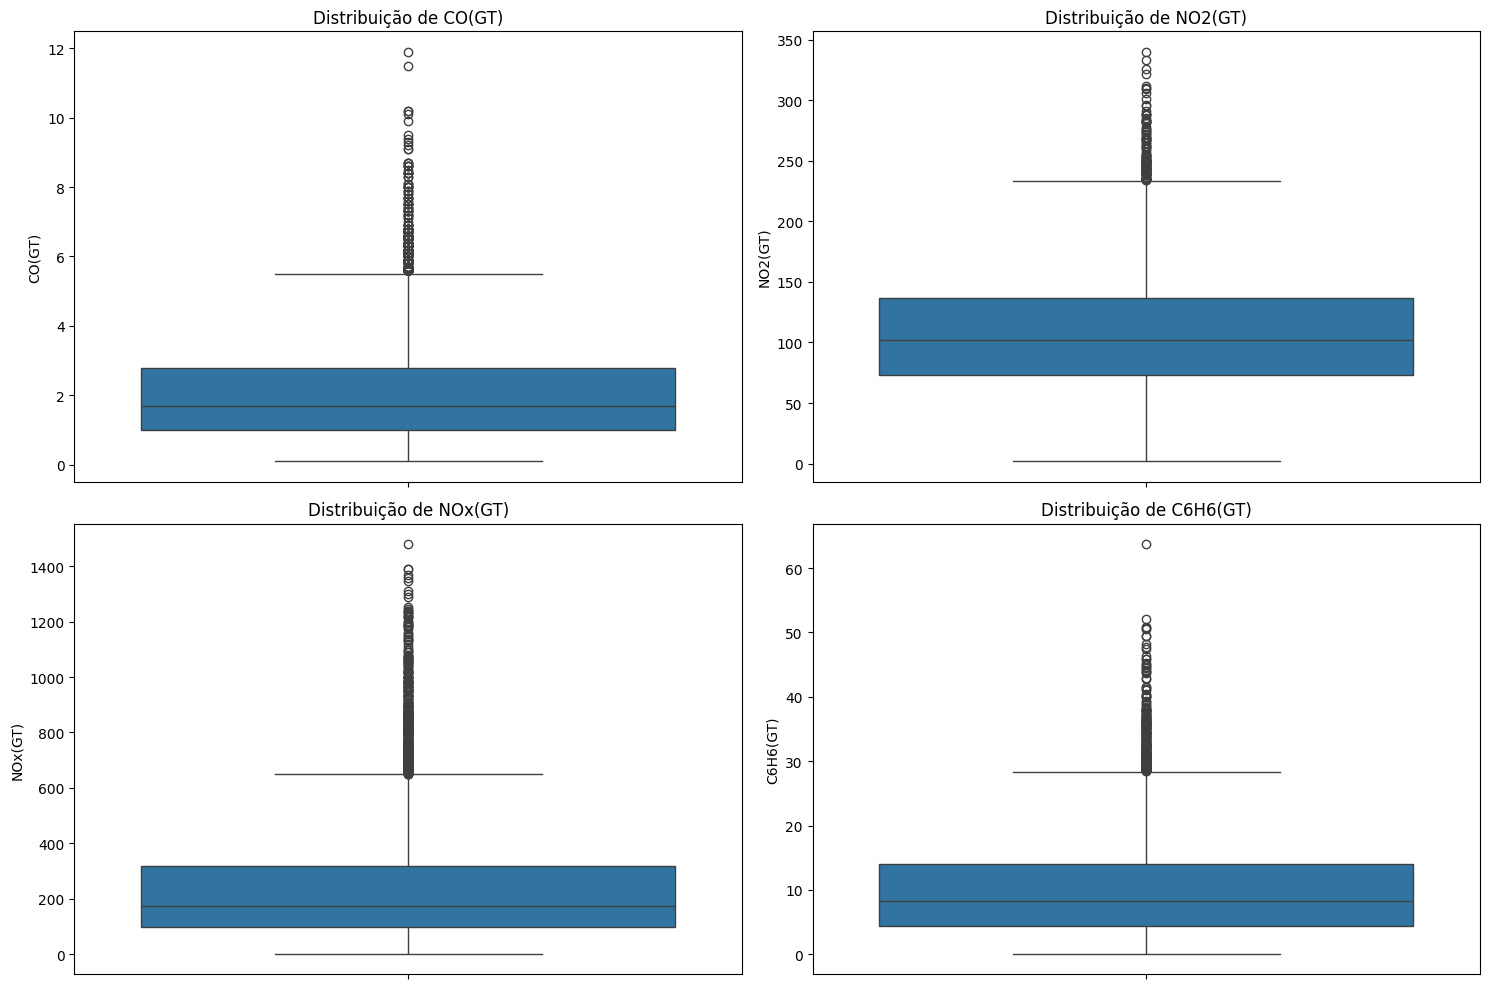

In [10]:
pollutants = ['CO(GT)', 'NO2(GT)', 'NOx(GT)', 'C6H6(GT)']
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
for i, pol in enumerate(pollutants):
    ax = axes[i//2, i%2]
    sns.boxplot(data=df, y=pol, ax=ax)
    ax.set_title(f'Distribuição de {pol}')
plt.tight_layout()
plt.show()

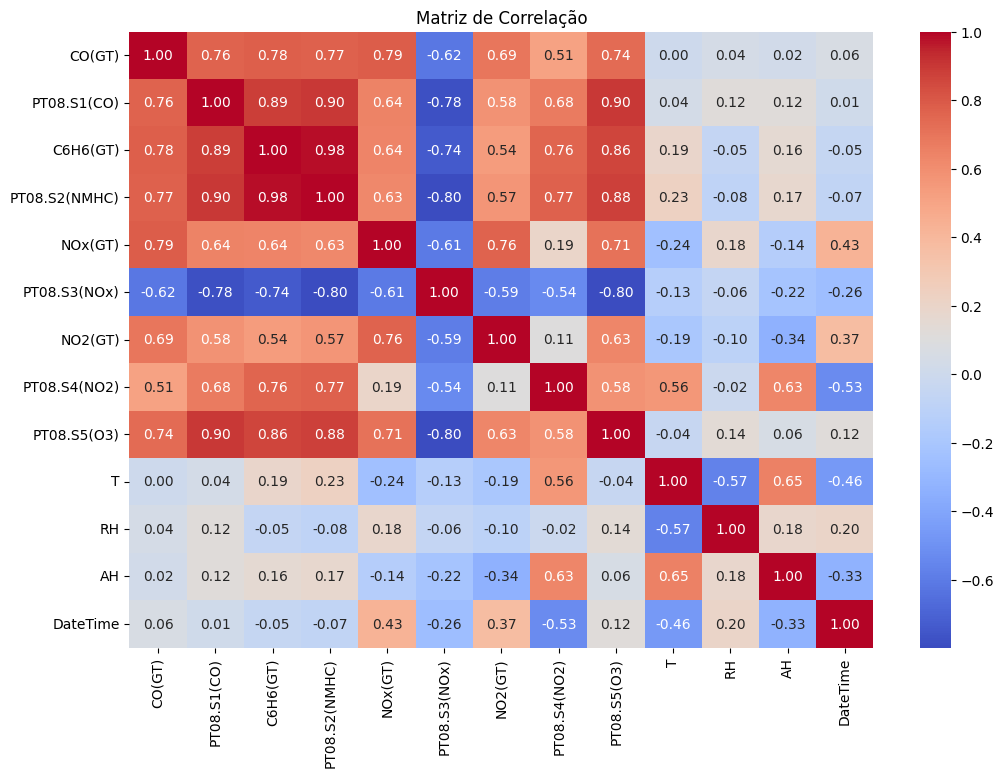

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

In [12]:
df.set_index('DateTime', inplace=True)
df['Hour'] = df.index.hour
df['Month'] = df.index.month
df['DayOfWeek'] = df.index.dayofweek

df['Hour_sin'] = np.sin(2 * np.pi * df['Hour']/24)
df['Hour_cos'] = np.cos(2 * np.pi * df['Hour']/24)
df['Month_sin'] = np.sin(2 * np.pi * df['Month']/12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month']/12)

features = ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)',
            'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)',
            'T', 'RH', 'AH', 'Hour_sin', 'Hour_cos', 'Month_sin', 'Month_cos',
            'DayOfWeek']

X = df[features]
y = df['CO(GT)']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'train_test_split' is not defined

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'SVR': SVR(kernel='rbf')
}

In [20]:
results = {}
for name, model in models.items():
    print(f"\nAvaliando {name}...")
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    results[name] = {
        'CV_R2': cv_scores.mean(),
        'Test_R2': r2_score(y_test, y_pred),
        'Test_RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }
    print(f"R² Test: {results[name]['Test_R2']:.4f}")
    print(f"RMSE: {results[name]['Test_RMSE']:.4f}")


Avaliando Linear Regression...
R² Test: 0.8250
RMSE: 0.6352

Avaliando Random Forest...
R² Test: 0.9068
RMSE: 0.4637

Avaliando Extra Trees...
R² Test: 0.9251
RMSE: 0.4156

Avaliando Gradient Boosting...
R² Test: 0.8829
RMSE: 0.5196

Avaliando KNN...
R² Test: 0.8979
RMSE: 0.4852

Avaliando SVR...
R² Test: 0.8934
RMSE: 0.4958


In [21]:
best_model_name = max(results.items(), key=lambda x: x[1]['Test_R2'])[0]
print(f"\nMelhor modelo: {best_model_name}")


Melhor modelo: Extra Trees
